In [1]:
import pandas as pd
import seaborn as sns
import glob
import pickle

# Raw Data

## Straits Times

In [2]:
#for single file
straitsTimesRaw = pd.read_excel("./articles/Straits Times.xlsx")
straitsTimesRaw.head()

,Unnamed: 0,Unnamed: 0.1,link,title,topics,category,sub_category,author,date,article,File
0,7,0,http://www.straitstimes.com/singapore/body-fou...,Body found in garbage chute area of Woodlands ...,"['POLICE', 'HDB']",Singapore,NaN,['Malavika Menon'],Published2 min ago,SINGAPORE - A man's body was found on the grou...,08122019195416.xlsx
1,8,0,https://www.straitstimes.com/sport/formula-one...,Formula One: Thai Alexander Albon given chance...,"['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",Sport,Formula-One,[],Published2 min ago,London (AFP) - Thai Formula One driver Alexand...,08122019195547.xlsx
2,9,0,https://www.straitstimes.com/singapore/the-str...,The Straits Times bags 8 wins at Asian Digital...,"['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZE...",Singapore,NaN,['Lydia Lam'],"PublishedNov 1, 2017, 6:26 pm SGT",SINGAPORE - The Straits Times bagged eight awa...,08122019195820.xlsx
3,10,0,https://www.straitstimes.com/lifestyle/play-su...,Games,['ST GAMES'],Lifestyle,NaN,[],"PublishedAug 8, 2018, 4:00 am SGT",Ready for a challenge? Try out daily Sudoku an...,08122019195820.xlsx
4,11,0,https://www.straitstimes.com/asia/east-asia/fl...,Hong Kong cancels all remaining Monday flights...,"['HONG KONG PROTESTS', 'CHINA', 'POLICE']",Asia,East-Asia,[],Published10 hours ago,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,08122019195820.xlsx


In [3]:
straitsTimesProcessed=straitsTimesRaw
straitsTimesProcessed['premium']=straitsTimesProcessed['article'].str.contains(r'Please subscribe or log in to continue reading the full article.')

In [4]:
straitsTimesProcessed[straitsTimesProcessed['premium']==1]

,Unnamed: 0,Unnamed: 0.1,link,title,topics,category,sub_category,author,date,article,File,premium
67,178,0,https://www.straitstimes.com/singapore/transpo...,Probe into car loans aimed at avoiding financi...,"['LOANS', 'CARS']",Singapore,Transport,JOYCE LIM,"PublishedAug 14, 2019, 5:00 am SGT",The authorities in Singapore are looking into ...,08142019201949.xlsx,True
68,182,0,https://www.straitstimes.com/singapore/environ...,Ivory trade ban signals S'pore's zero toleranc...,"['WILDLIFE CONSERVATION', 'WILDLIFE', 'ENVIRON...",Singapore,Environment,AUDREY TAN,"Aug 12, 2019, 3:51 pm SGT","SINGAPORE - Aug 12 is World Elephant Day, and ...",08142019201949.xlsx,True
70,200,0,https://www.straitstimes.com/lifestyle/enterta...,K-pop star Kang Daniel sets sales record for d...,"['K-POP', 'MUSICIANS']",Lifestyle,Entertainment,JAN LEE,"PublishedAug 13, 2019, 2:50 pm SGT","SINGAPORE - In the cut-throat world of K-pop, ...",08142019201949.xlsx,True
73,306,0,https://www.straitstimes.com/lifestyle/enterta...,Once Upon A Time In... Hollywood powered by Ta...,"['MOVIES', 'ACTORS']",Lifestyle,Entertainment,ALISON DE SOUZA,Published7 hours ago,LOS ANGELES - Hollywood loves movies about Hol...,08142019203048.xlsx,True
74,325,0,https://www.straitstimes.com/lifestyle/enterta...,Movie review: Action comedy Stuber is derivati...,"['MOVIE REVIEW', 'REVIEWS', 'MOVIES']",Lifestyle,Entertainment,JOHN LUI,Published7 hours ago,Action comedy105 minutes/Opens Aug 15/2 stars\...,08142019203048.xlsx,True
75,326,0,https://www.straitstimes.com/lifestyle/enterta...,Movie review: Immigrant experience set to Bruc...,"['MOVIE REVIEW', 'REVIEWS', 'MOVIES']",Lifestyle,Entertainment,JOHN LUI,Published8 hours ago,BLINDED BY THE LIGHT (PG)118 minutes/Opens Aug...,08142019203048.xlsx,True
79,569,0,https://www.straitstimes.com/lifestyle/enterta...,Album review: US metal titans Slipknot expand ...,"['MUSIC REVIEW', 'REVIEWS', 'MUSIC', 'ALBUMS']",Lifestyle,Entertainment,EDDINO ABDUL HADI,Published9 hours ago,WE ARE NOT YOUR KINDSlipknot\n\n\nPlease subsc...,08142019204728.xlsx,True
80,570,0,https://www.straitstimes.com/lifestyle/enterta...,Movie review: Scary Stories To Tell In The Dar...,"['MOVIE REVIEW', 'REVIEWS', 'MOVIES']",Lifestyle,Entertainment,JOHN LUI,Published9 hours ago,Horror adventure108 minutes/Opens Aug 15/3.5 s...,08142019204728.xlsx,True
87,710,0,https://www.straitstimes.com/singapore/educati...,Parents petition to review PSLE scoring system...,"['MINISTRY OF EDUCATION', 'PSLE', 'MOTHER TONG...",Singapore,Education,SANDRA DAVIE,"PublishedAug 13, 2019, 5:00 am SGT","An online petition has been launched, calling ...",08142019210457.xlsx,True
89,718,0,https://www.straitstimes.com/asia/se-asia/as-k...,"As Kuala Lumpur veers right, Democratic Action...","['MALAYSIAN POLITICS', 'PAKATAN HARAPAN']",Asia,Se-Asia,TRINNA LEONG,Published10 hours ago,KUALA LUMPUR - Unfulfilled pledges and sudden ...,08142019210457.xlsx,True


In [5]:
straitsTimesProcessed=straitsTimesProcessed[straitsTimesProcessed['premium']!=1]

In [6]:
flat_list = []

for index, row in straitsTimesProcessed.iterrows():    
    try:
        for item in list(straitsTimesProcessed['topics']):
            flat_list.append(item)
    except:
        print('error')

In [7]:
flat_list

["['POLICE', 'HDB']",
 "['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",
 "['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZES', 'THE STRAITS TIMES']",
 "['ST GAMES']",
 "['HONG KONG PROTESTS', 'CHINA', 'POLICE']",
 "['HONG KONG', 'HONG KONG PROTESTS']",
 "['CHANGI AIRPORT', 'PROTESTS', 'HONG KONG']",
 "['HONG KONG', 'PROTESTS', 'CHINA']",
 "['MALAYSIA', 'POLICE']",
 "['CELEBRITIES', 'DIVORCES', ' SEPARATIONS AND ANNULMENTS']",
 "['WATER CONSERVATION', 'CLIMATE CHANGE']",
 "['HONG KONG', 'HONG KONG PROTESTS']",
 "['LTA', 'LAM PIN MIN', 'SINGAPORE PARLIAMENT', 'PERSONAL MOBILITY DEVICES']",
 "['ASIAN INSIDER']",
 "['SINGAPORE COURTS', 'CIVIL LAWSUITS']",
 "['NATIONAL DAY', 'LEE HSIEN LOONG', 'NATIONAL DAY 2019']",
 "['NETHERLANDS', 'CHEMICALS']",
 "['CONCERT REVIEW', 'REVIEWS', 'CONCERTS', 'MUSIC', 'WESTLIFE']",
 "['JAPAN', 'SURVEYS', 'AVIATION/AEROSPACE SECTOR']",
 "['HANGOUT WITH ST', 'VIDEO SERIES', 'FACEBOOK', 'RACE ISSUES', 'AGEING']",
 "['BY INVITATION', 'MENTAL HEALTH', 'DOCTORS/SURGE

In [8]:
mylist = list(dict.fromkeys(flat_list))


In [9]:
flat_list

["['POLICE', 'HDB']",
 "['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",
 "['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZES', 'THE STRAITS TIMES']",
 "['ST GAMES']",
 "['HONG KONG PROTESTS', 'CHINA', 'POLICE']",
 "['HONG KONG', 'HONG KONG PROTESTS']",
 "['CHANGI AIRPORT', 'PROTESTS', 'HONG KONG']",
 "['HONG KONG', 'PROTESTS', 'CHINA']",
 "['MALAYSIA', 'POLICE']",
 "['CELEBRITIES', 'DIVORCES', ' SEPARATIONS AND ANNULMENTS']",
 "['WATER CONSERVATION', 'CLIMATE CHANGE']",
 "['HONG KONG', 'HONG KONG PROTESTS']",
 "['LTA', 'LAM PIN MIN', 'SINGAPORE PARLIAMENT', 'PERSONAL MOBILITY DEVICES']",
 "['ASIAN INSIDER']",
 "['SINGAPORE COURTS', 'CIVIL LAWSUITS']",
 "['NATIONAL DAY', 'LEE HSIEN LOONG', 'NATIONAL DAY 2019']",
 "['NETHERLANDS', 'CHEMICALS']",
 "['CONCERT REVIEW', 'REVIEWS', 'CONCERTS', 'MUSIC', 'WESTLIFE']",
 "['JAPAN', 'SURVEYS', 'AVIATION/AEROSPACE SECTOR']",
 "['HANGOUT WITH ST', 'VIDEO SERIES', 'FACEBOOK', 'RACE ISSUES', 'AGEING']",
 "['BY INVITATION', 'MENTAL HEALTH', 'DOCTORS/SURGE

## Asia One

In [10]:
asiaOneRaw = pd.read_excel("./articles/AsiaOne.xlsx")
asiaOneRaw.head()

,Unnamed: 0,link,title,topics,category,sub_category,author,date,article
0,0,http://www.asiaone.com/singapore/ntu-investiga...,NTU investigating inappropriate student behavi...,"NTU (Nanyang Technological University), Sexual...",singapore,NaN,Cheryl Teh,"Aug 15, 2019",The Nanyang Technological University (NTU) is ...
1,0,http://www.asiaone.com/digital/identity-crisis...,Identity crisis: Chronicling the (mis)adventur...,"Digital, meme",digital,NaN,Ilyas Sholihyn,"Aug 15, 2019",Batman Bin Suparman. The name that any heroic ...
2,0,http://www.asiaone.com/singapore/female-scdf-o...,Female SCDF officer's sex videos leaked online,"Singapore courts, crime",singapore,NaN,David Sun,"Aug 15, 2019",The police are investigating a series of sex v...
3,0,http://www.asiaone.com/singapore/batman-suparm...,Batman Suparman slashed by Foodpanda colleague...,"Singapore courts, crime",singapore,NaN,David Sun,"Aug 15, 2019",An argument in a WhatsApp group chat led to a ...
4,0,http://www.asiaone.com/singapore/missing-singa...,Missing Singaporean kayakers: Fishermen find b...,"malaysia, Rescue, Missing",singapore,NaN,Kok Yufeng,"Aug 15, 2019",The body of a woman wearing a life jacket was ...


In [11]:
asiaOneProcessed=asiaOneRaw
asiaOneProcessed['category']=asiaOneProcessed['category'].str.title()
asiaOneProcessed['category'].nunique()

10

## Channel News Asia

In [12]:
#Specify Folder Path
folderDirectory = r'./articles/william2/'
all_files = glob.glob(folderDirectory + "/*.csv")

In [13]:
# 2. Combine multiple reports into a single data frame

file_list = []

for filename in all_files:
    if '-final' in filename:
        file_list.append(filename)
        print(filename)
    #li.append(df)
    #df['File']=filename
    #df['File']=df['File'].str.split('\\').str[1]

./articles/william2\Asia-final.csv
./articles/william2\Business-final.csv
./articles/william2\Singapore-final.csv
./articles/william2\Sport-final.csv
./articles/william2\World-final.csv


In [14]:
li = []

for file in file_list:
    df = pd.read_csv(file, index_col=None, header=None)
    li.append(df)
    df['File']=file
    df['File']=df['File'].str.split('\\').str[1]

cnaRawData = pd.concat(li, axis=0, ignore_index=True)

In [15]:
cnaRawData.head()

,0,1,2,3,File
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv


In [16]:
cnaRawData['File'].unique()

array(['Asia-final.csv', 'Business-final.csv', 'Singapore-final.csv',
       'Sport-final.csv', 'World-final.csv'], dtype=object)

In [17]:
cnaProcessedData=cnaRawData
cnaProcessedData.rename(columns={1:'link'}, inplace=True)
cnaProcessedData.head()

,0,link,2,3,File
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv


In [18]:
def get_text(filename): 
    try:
        article_text = pd.read_csv("./articles/william2/"+filename, header=None,delimiter="\t",engine="python",error_bad_lines=False)
        text =', '.join(article_text[0])
        return text
        
    except:
        print('Unable to parse',filename)

In [19]:
cnaProcessedData["article"] = cnaProcessedData.apply(lambda x: get_text(x["link"]), axis=1)

Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected aft

Skipping line 26: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expect

Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 28: '	' exp

Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: unexpected end of data
Skipping line 8: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 42: '	' expected a

Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 40: '	' expected after '"'
Skipping line 46: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 4: '	' 

Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expec

Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' e

Skipping line 7: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected af

Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expec

Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expe

Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 3: '	' expecte

Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 14: unexpected end of data
Skipping line 38: '	' expect

Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 39: '	' expected after '"'
Skipping line 50: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected 

Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 26: '	' expect

Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected

Skipping line 17: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 8: '	' expected

Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 8: '	' expected af

Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 10: '	' expe

Skipping line 23: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 34: '	' expected after '"'
Skipping line 35: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 7: '	' expec

Skipping line 6: '	' expected after '"'
Skipping line 17: unexpected end of data
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: unexpected end of data
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expe

Skipping line 15: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 29: '	' ex

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected af

Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 7: unexpected end of data
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' exp

Skipping line 10: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 23: unexpected end of data
Skipping line 21: '	' expected after '"'
Skipping line 22: unexpected end of data
Skipping line 8: unexpected end of data
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 3: '	' 

Skipping line 16: unexpected end of data
Skipping line 3: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 6: unexp

Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 16: unexpected end of data
Skipping line 7: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 55: '	' expected after '"'
Skipping line 27: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	'

Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 29: '	' ex

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 32: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: unexpected end of data
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 7: unexpected end of data
Skipping line 4: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 36: '	' expecte

Skipping line 7: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 47: '	' expected after '"'
Skipping line 51: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 33: '	' expected after '"'
Skipping line 34: '	' 

Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 28: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after

Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected

Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expecte

Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected

Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 4: '	' expected 

Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected afte

Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected

Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 17: '	' expecte

Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected afte

Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 6: '	' expecte

Skipping line 7: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 10: '	' expect

Skipping line 7: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after

Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 23: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 30: '	' expected after '"'
Skipping line 31: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 10: '	' expect

Skipping line 4: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 21: '	' expected after '"'
Skipping line 22: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected

Skipping line 30: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 24: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected

Skipping line 5: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 18: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 7: '	' expected 

Skipping line 3: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 14: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 8: unexpected end of data
Skipping line 2: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 8: '	' expected after '"'
Skipping line 15: '	' expecte

Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 29: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 10: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 5: '	' expected after '"'
Skipping line 11: '	' expected 

Skipping line 9: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 17: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 3: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 7: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 15: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 6: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 13: '	' expected after '"'
Skipping line 16: '	' expected after '"'
Skipping line 20: '	' expected after '"'
Skipping line 25: '	' expected after '"'
Skipping line 26: '	' expected after '"'
Skipping line 4: '	' expected after '"'
Skipping line 9: '	' expected after '"'
Skipping line 12: '	' expected after '"'
Skipping line 19: '	' expected after '"'
Skipping line 2: '	' expected after '"'
Skipping line 9: '	' expec

In [20]:
cnaProcessed = cnaProcessedData
cnaProcessed.head()

,0,link,2,3,File,article
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv,BANGKOK: Thailand plans to distribute about 10...
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv,TAIPEI: Taiwan's President Tsai Ing-wen on Thu...
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv,HONG KONG: Hundreds of financial workers brave...
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv,YANGON: Raids on jungle drug labs have been me...
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv,NEW DELHI: India's Supreme Court on Thursday (...


In [21]:
cnaProcessed['category']=cnaProcessed['File'].str.split('-').str[0]
cnaProcessed['category'].unique()

array(['Asia', 'Business', 'Singapore', 'Sport', 'World'], dtype=object)

In [22]:
len(cnaProcessed)

6042

## The New Paper

In [46]:
#for single file
theNewPaperRaw = pd.read_excel("./articles/thenewpaper.xlsx")
theNewPaperRaw.head()

,Unnamed: 0,link,title,category,sub_category,author,date,article
0,0,https://www.tnp.sg/news/singapore/allowing-off...,Allowing offensive rap video to remain online ...,news,singapore,"ADRIAN LIM, POLITICAL CORRESPONDENT","Aug 23, 2019 06:00 am",\nIf a recent controversial rap video calling ...
1,0,https://www.tnp.sg/news/singapore/higher-tuiti...,Higher tuition fee bursaries for students from...,news,singapore,Adeline Tan,"Aug 23, 2019 06:00 am",\nStudents from needy families can have their ...
2,0,https://www.tnp.sg/news/singapore/productive-l...,‘Productive longevity’ behind changes for olde...,news,singapore,Sue-Ann Tan,"Aug 23, 2019 06:00 am","\nA vision of ""productive longevity"" lies behi..."
3,0,https://www.tnp.sg/news/singapore/ica-officers...,"ICA officers find 1,127 packs of contraband ci...",news,singapore,-,"Aug 23, 2019 06:00 am",\nWhen officers from the Immigration and Check...
4,0,https://www.tnp.sg/news/singapore/five-taken-h...,Five taken to hospital after multi-vehicle crash,news,singapore,David Sun,"Aug 23, 2019 06:00 am",\nFive people were injured in a multi-vehicle ...


In [48]:
theNewPaper=theNewPaperRaw
theNewPaper['sub_category']=theNewPaper['sub_category'].str.title()
theNewPaper['sub_category'].nunique()

21

# Number of Articles

In [50]:
print('Straits Times:',len(straitsTimesProcessed))
print('Asia One:',len(asiaOneProcessed))
print('Channel News Asia:',len(cnaProcessed))
print('The New Paper:',len(theNewPaper))

Straits Times: 351
Asia One: 284
Channel News Asia: 6042
The New Paper: 83


# Categories

## Straits Times 

Text(0.5, 1.0, 'Categories')

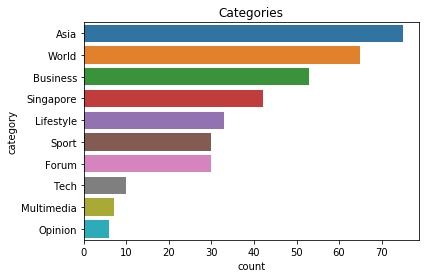

In [25]:
sns.countplot(y='category',data=straitsTimesProcessed,order=straitsTimesProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

## Asia One

Text(0.5, 1.0, 'Categories')

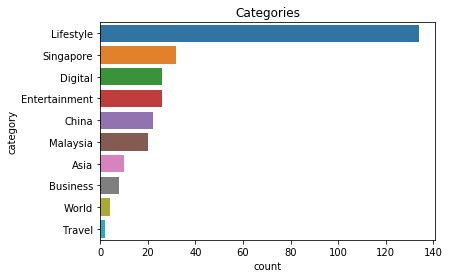

In [26]:
sns.countplot(y='category',data=asiaOneProcessed,order=asiaOneProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

## Channel News Asia

Text(0.5, 1.0, 'Categories')

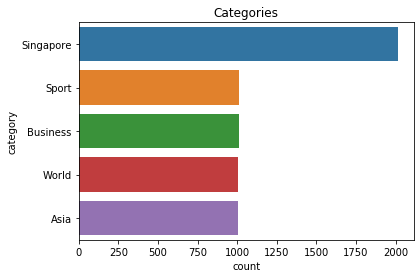

In [27]:
sns.countplot(y='category',data=cnaProcessed,order=cnaProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [28]:
cnaProcessed['category'].value_counts().iloc[:10]

Singapore    2012
Sport        1010
Business     1009
World        1007
Asia         1004
Name: category, dtype: int64

## The New Paper

Text(0.5, 1.0, 'Categories')

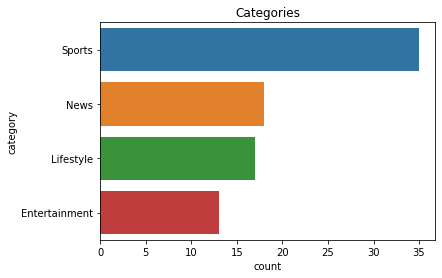

In [53]:
sns.countplot(y='category',data=theNewPaper,order=theNewPaper['category'].value_counts().iloc[:10].index).set_title("Categories") 

Text(0.5, 1.0, 'Categories')

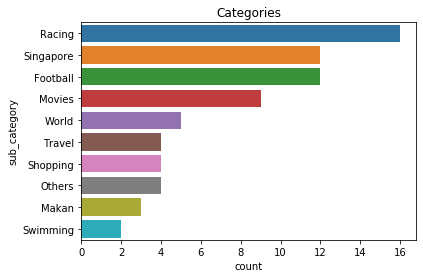

In [52]:
sns.countplot(y='sub_category',data=theNewPaper,order=theNewPaper['sub_category'].value_counts().iloc[:10].index).set_title("Categories") 

# Classification Categories

In [29]:
#Straits Times
category_codes = {
    'Asia': 'World',
    'China': 'World',
    'Malaysia': 'World',
    'Travel': 'Lifestyle',
    'Entertainment': 'Lifestyle'
}

In [30]:
straitsTimesProcessed = straitsTimesProcessed.replace({'category':category_codes})
straitsTimesProcessed.head()

,Unnamed: 0,Unnamed: 0.1,link,title,topics,category,sub_category,author,date,article,File,premium
0,7,0,http://www.straitstimes.com/singapore/body-fou...,Body found in garbage chute area of Woodlands ...,"['POLICE', 'HDB']",Singapore,NaN,['Malavika Menon'],Published2 min ago,SINGAPORE - A man's body was found on the grou...,08122019195416.xlsx,False
1,8,0,https://www.straitstimes.com/sport/formula-one...,Formula One: Thai Alexander Albon given chance...,"['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",Sport,Formula-One,[],Published2 min ago,London (AFP) - Thai Formula One driver Alexand...,08122019195547.xlsx,False
2,9,0,https://www.straitstimes.com/singapore/the-str...,The Straits Times bags 8 wins at Asian Digital...,"['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZE...",Singapore,NaN,['Lydia Lam'],"PublishedNov 1, 2017, 6:26 pm SGT",SINGAPORE - The Straits Times bagged eight awa...,08122019195820.xlsx,False
3,10,0,https://www.straitstimes.com/lifestyle/play-su...,Games,['ST GAMES'],Lifestyle,NaN,[],"PublishedAug 8, 2018, 4:00 am SGT",Ready for a challenge? Try out daily Sudoku an...,08122019195820.xlsx,False
4,11,0,https://www.straitstimes.com/asia/east-asia/fl...,Hong Kong cancels all remaining Monday flights...,"['HONG KONG PROTESTS', 'CHINA', 'POLICE']",World,East-Asia,[],Published10 hours ago,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,08122019195820.xlsx,False


Text(0.5, 1.0, 'Categories')

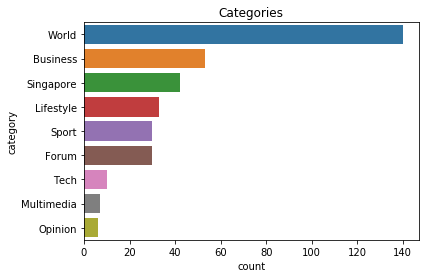

In [31]:
sns.countplot(y='category',data=straitsTimesProcessed,order=straitsTimesProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [32]:
asiaOneProcessed = asiaOneProcessed.replace({'category':category_codes})
asiaOneProcessed.head()

,Unnamed: 0,link,title,topics,category,sub_category,author,date,article
0,0,http://www.asiaone.com/singapore/ntu-investiga...,NTU investigating inappropriate student behavi...,"NTU (Nanyang Technological University), Sexual...",Singapore,NaN,Cheryl Teh,"Aug 15, 2019",The Nanyang Technological University (NTU) is ...
1,0,http://www.asiaone.com/digital/identity-crisis...,Identity crisis: Chronicling the (mis)adventur...,"Digital, meme",Digital,NaN,Ilyas Sholihyn,"Aug 15, 2019",Batman Bin Suparman. The name that any heroic ...
2,0,http://www.asiaone.com/singapore/female-scdf-o...,Female SCDF officer's sex videos leaked online,"Singapore courts, crime",Singapore,NaN,David Sun,"Aug 15, 2019",The police are investigating a series of sex v...
3,0,http://www.asiaone.com/singapore/batman-suparm...,Batman Suparman slashed by Foodpanda colleague...,"Singapore courts, crime",Singapore,NaN,David Sun,"Aug 15, 2019",An argument in a WhatsApp group chat led to a ...
4,0,http://www.asiaone.com/singapore/missing-singa...,Missing Singaporean kayakers: Fishermen find b...,"malaysia, Rescue, Missing",Singapore,NaN,Kok Yufeng,"Aug 15, 2019",The body of a woman wearing a life jacket was ...


Text(0.5, 1.0, 'Categories')

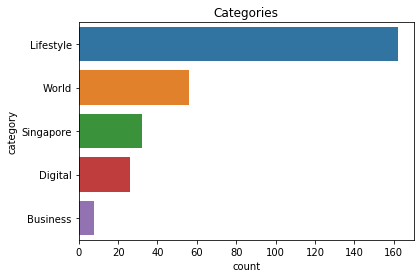

In [33]:
sns.countplot(y='category',data=asiaOneProcessed,order=asiaOneProcessed['category'].value_counts().iloc[:10].index).set_title("Categories") 

In [34]:
cnaProcessed = cnaProcessed.replace({'category':category_codes})
cnaProcessed.head()

,0,link,2,3,File,article,category
0,Thailand set to deliver first batch of medical...,Asia-articles-txt/articles1txt,01 Aug 2019 08:48PM,"Withoon Danwiboon,GPO,cannabis,medical health,...",Asia-final.csv,BANGKOK: Thailand plans to distribute about 10...,World
1,Taiwan president slams Beijing's solo tourist ban,Asia-articles-txt/articles2txt,01 Aug 2019 08:25PM,"Beijing,Tsai Ing-wen,China,Taiwan,travel,mainl...",Asia-final.csv,TAIPEI: Taiwan's President Tsai Ing-wen on Thu...,World
2,Hong Kong financial workers stage flash protest,Asia-articles-txt/articles3txt,01 Aug 2019 08:24PM,"Hong Kong,Hong Kong protests,Asia",Asia-final.csv,HONG KONG: Hundreds of financial workers brave...,World
3,Drug lab raids in Myanmar's meth capital met w...,Asia-articles-txt/articles4txt,01 Aug 2019 08:14PM,"Myanmar,crime,Yangon,Asia",Asia-final.csv,YANGON: Raids on jungle drug labs have been me...,World
4,India's top court moves politician's rape tria...,Asia-articles-txt/articles5txt,01 Aug 2019 07:46PM,"New Delhi,Supreme Court,news and politics,inti...",Asia-final.csv,NEW DELHI: India's Supreme Court on Thursday (...,World


In [35]:
cnaProcessed['category'].unique()

array(['World', 'Business', 'Singapore', 'Sport'], dtype=object)

# Concatenate All Sources

In [36]:
pdList = [straitsTimesProcessed, asiaOneProcessed,cnaProcessed]  # List of your dataframes
df = pd.concat(pdList)
df.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,File,Unnamed: 0,Unnamed: 0.1,article,author,category,date,link,premium,sub_category,title,topics,0,2,3
0,08122019195416.xlsx,7.0,0.0,SINGAPORE - A man's body was found on the grou...,['Malavika Menon'],Singapore,Published2 min ago,http://www.straitstimes.com/singapore/body-fou...,False,NaN,Body found in garbage chute area of Woodlands ...,"['POLICE', 'HDB']",NaN,NaN,NaN
1,08122019195547.xlsx,8.0,0.0,London (AFP) - Thai Formula One driver Alexand...,[],Sport,Published2 min ago,https://www.straitstimes.com/sport/formula-one...,False,Formula-One,Formula One: Thai Alexander Albon given chance...,"['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",NaN,NaN,NaN
2,08122019195820.xlsx,9.0,0.0,SINGAPORE - The Straits Times bagged eight awa...,['Lydia Lam'],Singapore,"PublishedNov 1, 2017, 6:26 pm SGT",https://www.straitstimes.com/singapore/the-str...,False,NaN,The Straits Times bags 8 wins at Asian Digital...,"['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZE...",NaN,NaN,NaN
3,08122019195820.xlsx,10.0,0.0,Ready for a challenge? Try out daily Sudoku an...,[],Lifestyle,"PublishedAug 8, 2018, 4:00 am SGT",https://www.straitstimes.com/lifestyle/play-su...,False,NaN,Games,['ST GAMES'],NaN,NaN,NaN
4,08122019195820.xlsx,11.0,0.0,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,[],World,Published10 hours ago,https://www.straitstimes.com/asia/east-asia/fl...,False,East-Asia,Hong Kong cancels all remaining Monday flights...,"['HONG KONG PROTESTS', 'CHINA', 'POLICE']",NaN,NaN,NaN


# Code Categorizes

In [37]:
article_categories = {
    'Lifestyle': 0,
    'Business': 1,
    'World': 2,
    'Singapore': 3,
    'Sport': 4,
    'Tech': 5
}

In [38]:
df['Category_Code'] = df['category']
df = df.replace({'Category_Code':article_categories})
df.head()

,File,Unnamed: 0,Unnamed: 0.1,article,author,category,date,link,premium,sub_category,title,topics,0,2,3,Category_Code
0,08122019195416.xlsx,7.0,0.0,SINGAPORE - A man's body was found on the grou...,['Malavika Menon'],Singapore,Published2 min ago,http://www.straitstimes.com/singapore/body-fou...,False,NaN,Body found in garbage chute area of Woodlands ...,"['POLICE', 'HDB']",NaN,NaN,NaN,3
1,08122019195547.xlsx,8.0,0.0,London (AFP) - Thai Formula One driver Alexand...,[],Sport,Published2 min ago,https://www.straitstimes.com/sport/formula-one...,False,Formula-One,Formula One: Thai Alexander Albon given chance...,"['THAILAND', 'GRAND PRIX', 'ALEXANDER ALBON']",NaN,NaN,NaN,4
2,08122019195820.xlsx,9.0,0.0,SINGAPORE - The Straits Times bagged eight awa...,['Lydia Lam'],Singapore,"PublishedNov 1, 2017, 6:26 pm SGT",https://www.straitstimes.com/singapore/the-str...,False,NaN,The Straits Times bags 8 wins at Asian Digital...,"['SINGAPORE PRESS HOLDINGS', 'AWARDS AND PRIZE...",NaN,NaN,NaN,3
3,08122019195820.xlsx,10.0,0.0,Ready for a challenge? Try out daily Sudoku an...,[],Lifestyle,"PublishedAug 8, 2018, 4:00 am SGT",https://www.straitstimes.com/lifestyle/play-su...,False,NaN,Games,['ST GAMES'],NaN,NaN,NaN,0
4,08122019195820.xlsx,11.0,0.0,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,[],World,Published10 hours ago,https://www.straitstimes.com/asia/east-asia/fl...,False,East-Asia,Hong Kong cancels all remaining Monday flights...,"['HONG KONG PROTESTS', 'CHINA', 'POLICE']",NaN,NaN,NaN,2


In [39]:
df['Category_Code'].unique()

array([3, 4, 0, 2, 'Multimedia', 'Opinion', 1, 5, 'Forum', 'Digital'],
      dtype=object)

In [40]:
df=df[pd.to_numeric(df['Category_Code'], errors='coerce').notnull()]

In [41]:
df['Category_Code'].unique()

array([3, 4, 0, 2, 1, 5], dtype=object)

In [42]:
articles = df[['article','category','Category_Code']]
articles.head()

,article,category,Category_Code
0,SINGAPORE - A man's body was found on the grou...,Singapore,3
1,London (AFP) - Thai Formula One driver Alexand...,Sport,4
2,SINGAPORE - The Straits Times bagged eight awa...,Singapore,3
3,Ready for a challenge? Try out daily Sudoku an...,Lifestyle,0
4,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,World,2


In [43]:
len(articles)

6608

In [44]:
articles.to_excel('./Input/all_articles.xlsx')

In [45]:
# TF-IDF object
with open('Pickles/articles.pickle', 'wb') as output:
    pickle.dump(articles, output)